In [1]:
#%matplotlib inline
%matplotlib notebook

# conda install basemap netCDF4

In [2]:
from mpl_toolkits.basemap import Basemap, shiftgrid, maskoceans, interp
import numpy as np
import matplotlib.pyplot as plt

## example showing how to mask out 'wet' areas<br> on a contour or pcolor plot.

read topography data

In [3]:
topodatin = np.loadtxt('data/etopo20data.gz')
lonsin = np.loadtxt('data/etopo20lons.gz')
latsin = np.loadtxt('data/etopo20lats.gz')

## shift data so lons go from -180 to 180 instead of 20 to 380.

In [4]:
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons1 = shiftgrid(180.,topodatin,lonsin,start=False)
lats1 = latsin

## create a map

<IPython.core.display.Javascript object>


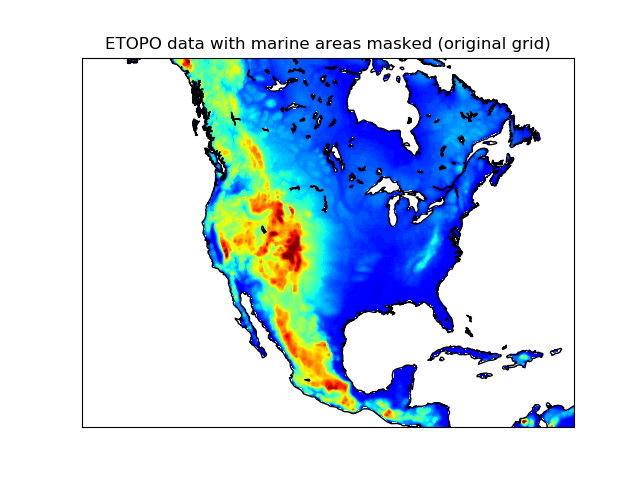

In [5]:
fig=plt.figure()
# setup basemap
m=Basemap(resolution='l',projection='lcc',lon_0=-100,lat_0=40,width=8.e6,height=6.e6)
lons, lats = np.meshgrid(lons1,lats1)
x, y = m(lons, lats)

## interpolate land/sea mask to topo grid,<br> mask ocean values.

In [6]:
# interpolate land/sea mask to topo grid, mask ocean values.
# output may look 'blocky' near coastlines, since data is at much
# lower resolution than land/sea mask.
topo = maskoceans(lons, lats, topoin)

## make contour plot (ocean values will be masked)

In [7]:
# make contour plot (ocean values will be masked)
CS=m.contourf(x,y,topo,np.arange(-300,3001,50),cmap=plt.cm.jet,extend='both')

In [ ]:
## draw coastlines and title

In [8]:
#im=m.pcolormesh(x,y,topo,cmap=plt.cm.jet,vmin=-300,vmax=3000)
# draw coastlines.
m.drawcoastlines()
plt.title('ETOPO data with marine areas masked (original grid)')

Text(0.5, 1.0, 'ETOPO data with marine areas masked (original grid)')

## create new a map

<IPython.core.display.Javascript object>


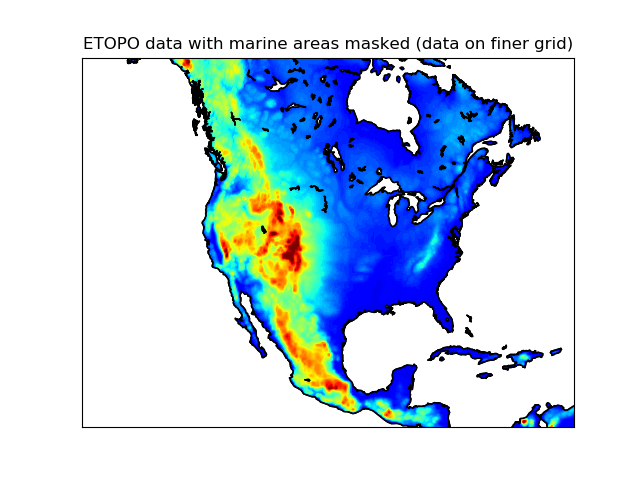

In [9]:
fig=plt.figure()

## interpolate topo data to higher resolution grid
(to better match the land/sea mask). <br>
Output looks less 'blocky' near coastlines.

In [10]:
# interpolate topo data to higher resolution grid (to better match
# the land/sea mask). Output looks less 'blocky' near coastlines.
nlats = 3*topoin.shape[0]
nlons = 3*topoin.shape[1]
lons = np.linspace(-180,180,nlons)
lats = np.linspace(-90,90,nlats)
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)
topo = interp(topoin,lons1,lats1,lons,lats,order=1)

## interpolate land/sea mask to topo grid,<br> mask ocean values for high resolution version.

In [11]:
# interpolate land/sea mask to topo grid, mask ocean values.
topo = maskoceans(lons, lats, topo)

## make contour plot (ocean values will be masked)

In [12]:
# make contour plot (ocean values will be masked)
CS=m.contourf(x,y,topo,np.arange(-300,3001,50),cmap=plt.cm.jet,extend='both')
#im=m.pcolormesh(x,y,topo,cmap=plt.cm.jet,vmin=-300,vmax=3000)

## draw coastlines and title.

In [15]:
# draw coastlines.
m.drawcoastlines()
plt.title('ETOPO data with marine areas masked (data on finer grid)')

Text(0.5, 1.0, 'ETOPO data with marine areas masked (data on finer grid)')

In [16]:
#plt.show()